# **Importing the Libraries**

In [ ]:
import numpy as np
import pandas as pd
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving spam.csv to spam.csv


# **Read the DataSet**

In [ ]:
df = pd.read_csv('/content/spam.csv', encoding="ISO-8859-1")

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df = df[['v1','v2']]
df.rename(columns = {'v1':'label','v2':'msg'}, inplace = True)

<ipython-input-6-c1c62c3b687b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {'v1':'label','v2':'msg'}, inplace = True)


In [ ]:
df.head()

,label,msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.shape

(5572, 2)

# **Handling missing Values**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   msg     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.describe(include='O')

,label,msg
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


# **Mapping Values For Label**

In [ ]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# **Handling Imbalance Data**

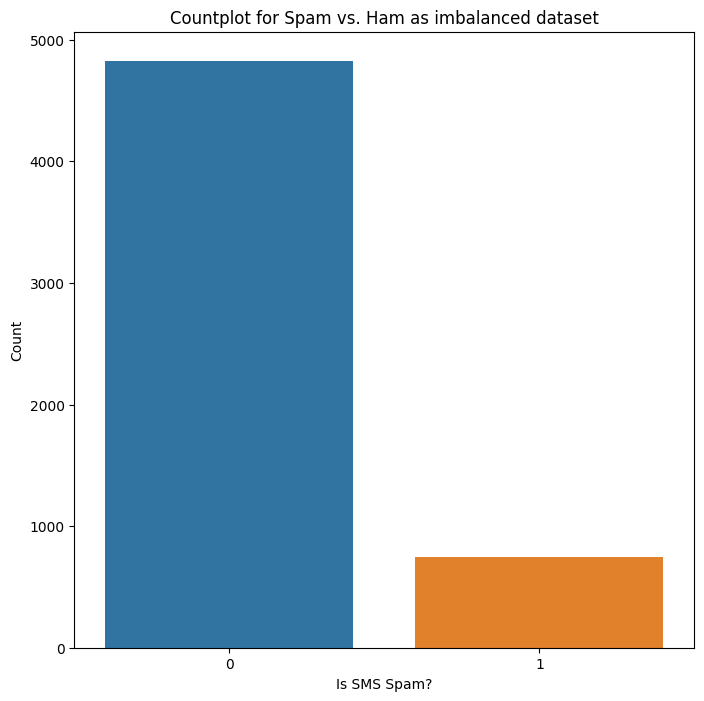

In [ ]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='label', data=df)
p = plt.title('Countplot for Spam vs. Ham as imbalanced dataset')
p = plt.xlabel('Is SMS Spam?')
p = plt.ylabel('Count')

Handling Imbalance dataset using Oversampling

In [ ]:
only_spam = df[df['label']==1]
print('Number of Spam records: {}'.format(only_spam.shape[0]))
print('Number of Ham records: {}'.format(df.shape[0]-only_spam.shape[0]))

Number of Spam records: 747
Number of Ham records: 4825


In [ ]:
count = int((df.shape[0]-only_spam.shape[0])/only_spam.shape[0])
for i in range(0, count-1):
  df = pd.concat([df, only_spam])

df.shape

(9307, 2)

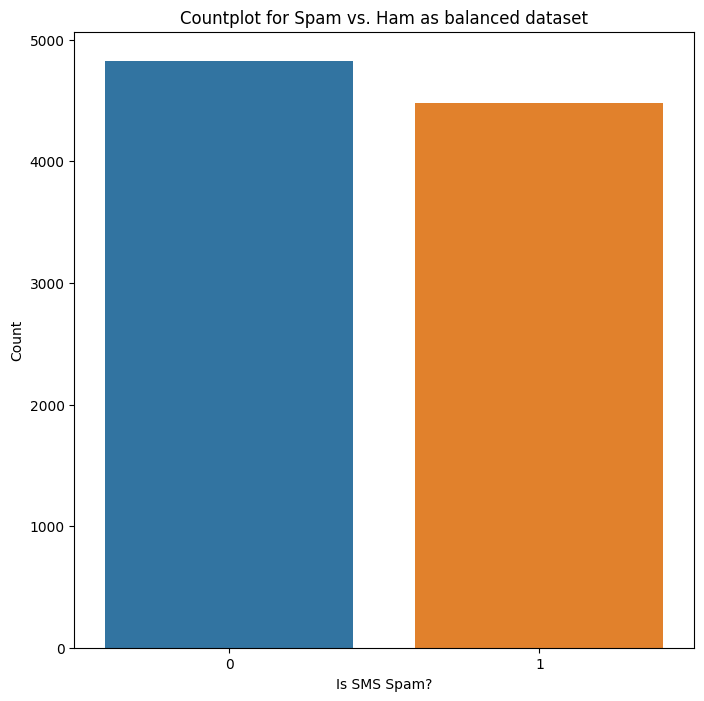

In [ ]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='label', data=df)
p = plt.title('Countplot for Spam vs. Ham as balanced dataset')
p = plt.xlabel('Is SMS Spam?')
p = plt.ylabel('Count')


In [ ]:
df['word_count'] = df['msg'].apply(lambda x: len(x.split()))
df.head()

,label,msg,word_count
0,0,"Go until jurong point, crazy.. Available only ...",20
1,0,Ok lar... Joking wif u oni...,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,0,U dun say so early hor... U c already then say...,11
4,0,"Nah I don't think he goes to usf, he lives aro...",13


<ipython-input-16-6776e7c342cf>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(a=df[df['label']==0].word_count)
<ipython-input-16-6776e7c342cf>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(a=df[df['label']==1].word_count, color='red')


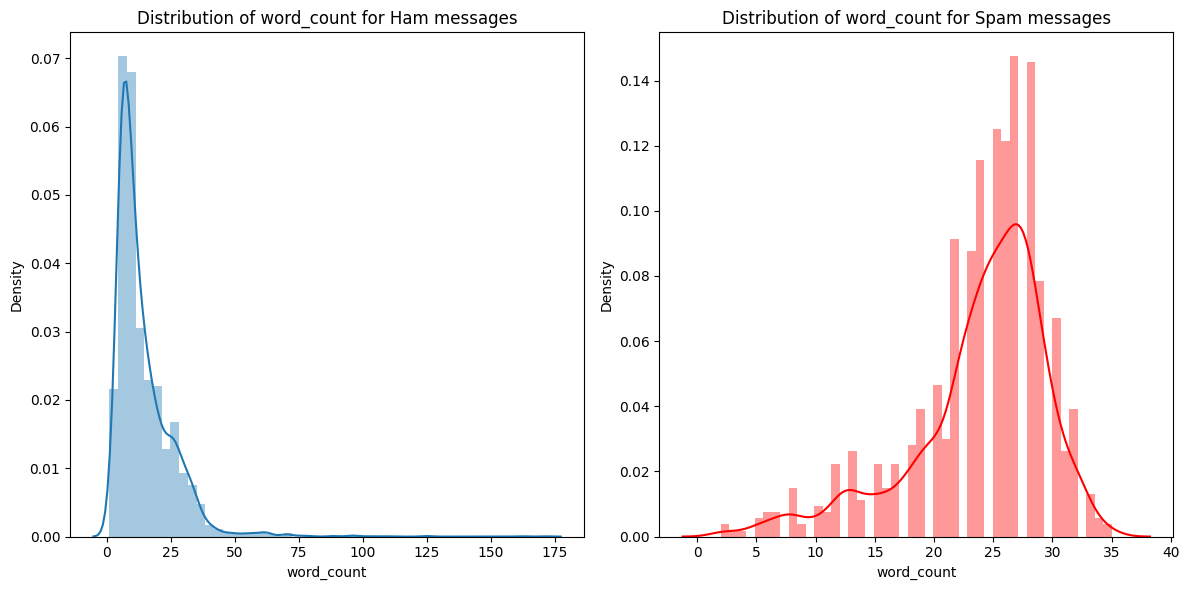

In [ ]:
plt.figure(figsize=(12, 6))

# 1-row, 2-column, go to the first subplot
plt.subplot(1, 2, 1)
g = sns.distplot(a=df[df['label']==0].word_count)
p = plt.title('Distribution of word_count for Ham messages')

# 1-row, 2-column, go to the second subplot
plt.subplot(1, 2, 2)
g = sns.distplot(a=df[df['label']==1].word_count, color='red')
p = plt.title('Distribution of word_count for Spam messages')

plt.tight_layout()
plt.show()

In [ ]:
def currency(x):
  currency_symbols = ['€', '$', '¥', '£', '₹']
  for i in currency_symbols:
    if i in x:
      return 1
  return 0

df['contains_currency_symbol'] = df['msg'].apply(currency)
df.head()

,label,msg,word_count,contains_currency_symbol
0,0,"Go until jurong point, crazy.. Available only ...",20,0
1,0,Ok lar... Joking wif u oni...,6,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0
3,0,U dun say so early hor... U c already then say...,11,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0


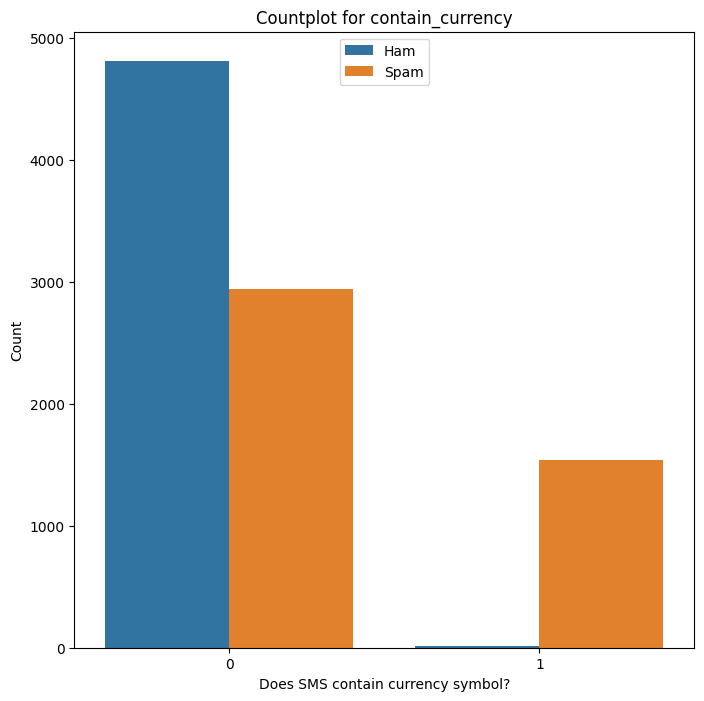

In [ ]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='contains_currency_symbol', data=df, hue='label')
p = plt.title('Countplot for contain_currency')
p = plt.xlabel('Does SMS contain currency symbol?')
p = plt.ylabel('Count')
p = plt.legend(labels=['Ham', 'Spam'], loc=9)


In [ ]:
def numbers(x):
  for i in x:
    if ord(i)>=48 and ord(i)<=57:
      return 1
  return 0

df['contains_number'] = df['msg'].apply(numbers)
df.head()

,label,msg,word_count,contains_currency_symbol,contains_number
0,0,"Go until jurong point, crazy.. Available only ...",20,0,0
1,0,Ok lar... Joking wif u oni...,6,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0,1
3,0,U dun say so early hor... U c already then say...,11,0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0,0


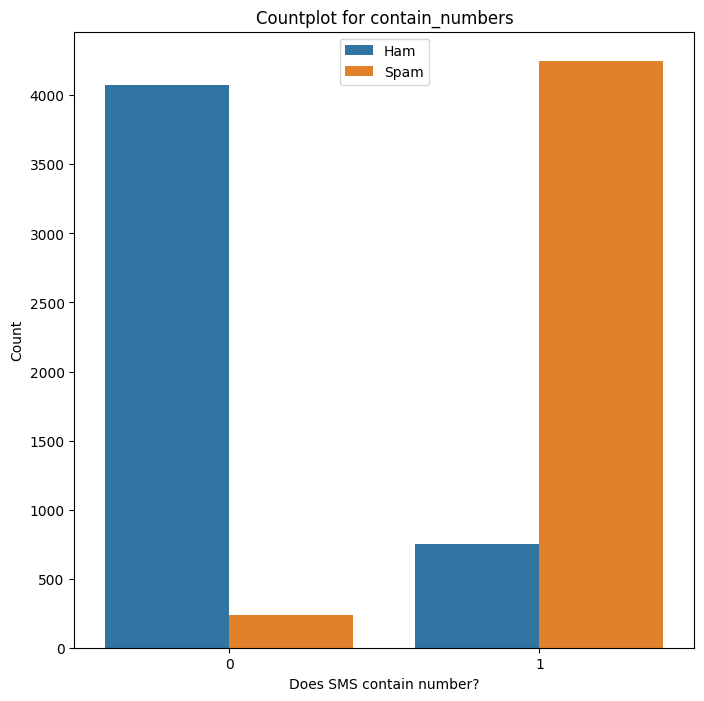

In [ ]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='contains_number', data=df, hue='label')
p = plt.title('Countplot for contain_numbers')
p = plt.xlabel('Does SMS contain number?')
p = plt.ylabel('Count')
p = plt.legend(labels=['Ham', 'Spam'], loc=9)

<Axes: ylabel='Frequency'>

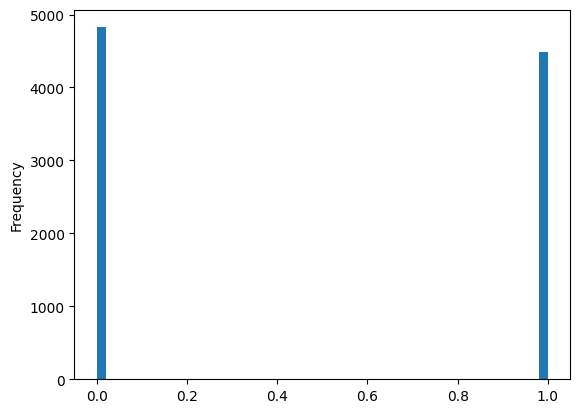

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
df['label'].plot(bins=50, kind='hist')

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

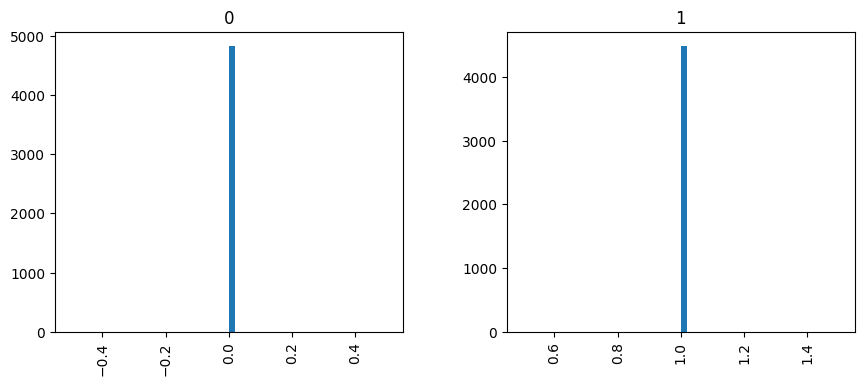

In [ ]:
df.hist(column='label', by='label', bins=50,figsize=(10,4))

# **Cleaning the Text Data**

In [ ]:
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
corpus = []
wnl = WordNetLemmatizer()

for sms_string in list(df.msg):

  # Cleaning special character from the sms
  message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sms_string)

  # Converting the entire sms into lower case
  message = message.lower()

  # Tokenizing the sms by words
  words = message.split()

  # Removing the stop words
  filtered_words = [word for word in words if word not in set(stopwords.words('english'))]

  # Lemmatizing the words
  lemmatized_words = [wnl.lemmatize(word) for word in filtered_words]

  # Joining the lemmatized words
  message = ' '.join(lemmatized_words)

  # Building a corpus of messages
  corpus.append(message)

In [ ]:
# Creating the Bag of Words model

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=500)
vectors = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names_out()

# Extracting independent and dependent variables from the dataset
X = pd.DataFrame(vectors, columns=feature_names)
y = df['label']

In [ ]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))

In [ ]:
X


,ac,access,account,address,admirer,age,already,also,always,amp,...,xxx,ya,yeah,year,yes,yesterday,yet,yo,yr,yup
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.409254,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9302,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
9303,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.325761,0.0,0.0,0.0,0.0,0.0
9304,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.287064,0.0,0.0,0.0,0.0,0.0
9305,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


# **Descriptive Statistical**

In [ ]:
df.describe(include='O')

,msg
count,9307
unique,5169
top,"Sorry, I'll call later"
freq,30


In [ ]:
df.shape

(9307, 5)

# **Scaling the Data**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# **Spliting data into train and test**

In [ ]:
#split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,ac,access,account,address,admirer,age,already,also,always,amp,...,xxx,ya,yeah,year,yes,yesterday,yet,yo,yr,yup
3533,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2592,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4253,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6976,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7191,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5191,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5390,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Model Building**

# **training the model in multiple algorithms**

# **Naive Bayes Model**

In [ ]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
cv = cross_val_score(mnb, X, y, scoring='f1', cv=10)
print('--- Average F1-Score for MNB model: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average F1-Score for MNB model: 0.944 ---
Standard Deviation: 0.004


In [ ]:
# Classification report for MNB model
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)

print('--- Classification report for MNB model ---')
print(classification_report(y_test, y_pred))


--- Classification report for MNB model ---
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       958
           1       0.94      0.94      0.94       904

    accuracy                           0.94      1862
   macro avg       0.94      0.94      0.94      1862
weighted avg       0.94      0.94      0.94      1862



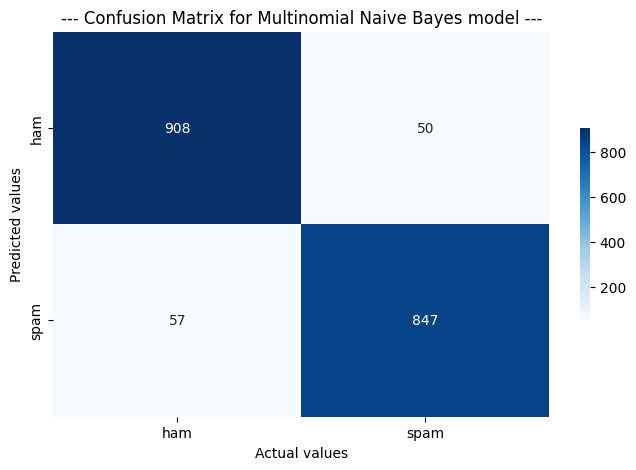

In [ ]:
# Confusion matrix of MNB model
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g', cbar_kws={"shrink": 0.5})
p = plt.xlabel('Actual values')
p = plt.ylabel('Predicted values')
p = plt.title('--- Confusion Matrix for Multinomial Naive Bayes model ---')

In [ ]:
# Fitting Random Forest to the Training set
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
cv = cross_val_score(dt, X, y, scoring='f1', cv=10)
print('--- Average F1-Score for Decision Tree model: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average F1-Score for Decision Tree model: 0.979 ---
Standard Deviation: 0.005


# **Decision Tree Model**

In [ ]:
# Classification report for Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print('--- Classification report for Decision Tree model ---')
print(classification_report(y_test, y_pred))

--- Classification report for Decision Tree model ---
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       958
           1       0.97      1.00      0.98       904

    accuracy                           0.98      1862
   macro avg       0.98      0.98      0.98      1862
weighted avg       0.98      0.98      0.98      1862



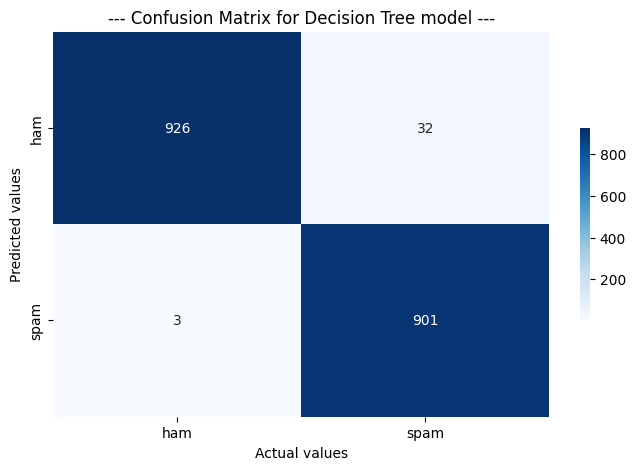

In [ ]:
# Confusion matrix of Decision Tree model
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g', cbar_kws={"shrink": 0.5})
p = plt.xlabel('Actual values')
p = plt.ylabel('Predicted values')
p = plt.title('--- Confusion Matrix for Decision Tree model ---')

In [ ]:
# Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10)
cv = cross_val_score(rf, X, y, scoring='f1', cv=10)
print('--- Average F1-Score for Random Forest model: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))
rf

--- Average F1-Score for Random Forest model: 0.994 ---
Standard Deviation: 0.002


RandomForestClassifier(n_estimators=10)

# **Random Forest Model**

In [ ]:
# Classification report for Random Forest model
rf = RandomForestClassifier(n_estimators=20)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('--- Classification report for Random Forest model ---')
print(classification_report(y_test, y_pred))
y_pred

--- Classification report for Random Forest model ---
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       958
           1       0.99      1.00      1.00       904

    accuracy                           1.00      1862
   macro avg       1.00      1.00      1.00      1862
weighted avg       1.00      1.00      1.00      1862



array([0, 1, 1, ..., 0, 1, 0])

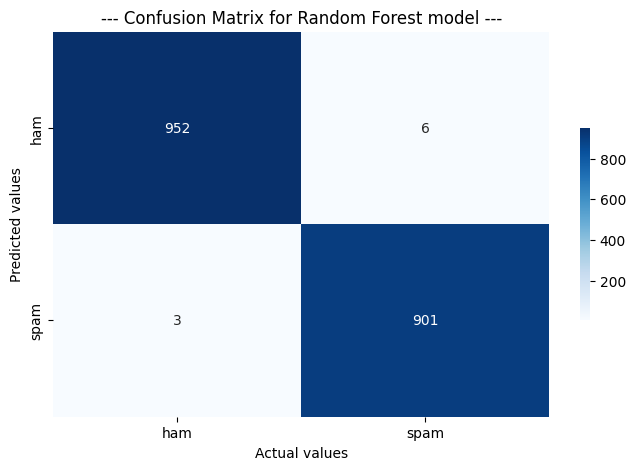

In [ ]:
# Confusion matrix of Random Forest model
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g', cbar_kws={"shrink": 0.5})
p = plt.xlabel('Actual values')
p = plt.ylabel('Predicted values')
p = plt.title('--- Confusion Matrix for Random Forest model ---')

In [ ]:
model = rf
pickle.dump(model,open('rfm.pkl','wb'))

In [ ]:
from flask import Flask, render_template, request
import numpy as np
import pickle

In [ ]:
app = Flask(__name__)
model = pickle.load(open(r'rf.pkl','rb'))